In [1]:
import xarray as xr
import matplotlib.pyplot as plt

import data_catalog
import tseries_mod
import esmlab_wrap

In [2]:
data_catalog.set_catalog('experiments')
experiment = 'esm-piControl'
varnames = ['DIC_RIV_FLUX', 'DOC_RIV_FLUX', 'DOCr_RIV_FLUX', 'ALK_RIV_FLUX', 'pocToSed', 'calcToSed']

active catalog: experiments


In [3]:
ds = tseries_mod.tseries_get_vars(varnames, 'ocn', experiment)
# print(ds)

In [4]:
ds['Ctot_RIV_FLUX'] = ds.DIC_RIV_FLUX + ds.DOC_RIV_FLUX + ds.DOCr_RIV_FLUX
ds.Ctot_RIV_FLUX.attrs['units'] = ds.DIC_RIV_FLUX.attrs['units']
ds.Ctot_RIV_FLUX.name = 'Ctot_RIV_FLUX'

ds['CtotToSed'] = ds.pocToSed + ds.calcToSed
ds.CtotToSed.attrs['units'] = ds.pocToSed.attrs['units']
ds.CtotToSed.name = 'CtotToSed'

ds['AlkToSed'] = 2*ds.calcToSed
ds.AlkToSed.attrs['units'] = ds.calcToSed.attrs['units']
ds.AlkToSed.name = 'AlkToSed'

# ds

In [5]:
ds_ann = esmlab_wrap.compute_ann_mean(ds)
# ds_ann

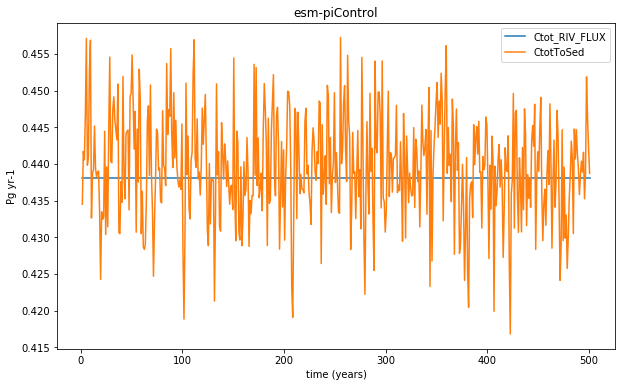

In [6]:
tseries_mod.tseries_plot_1ds(ds_ann, ['Ctot_RIV_FLUX', 'CtotToSed'], title=experiment, region_val='Global')

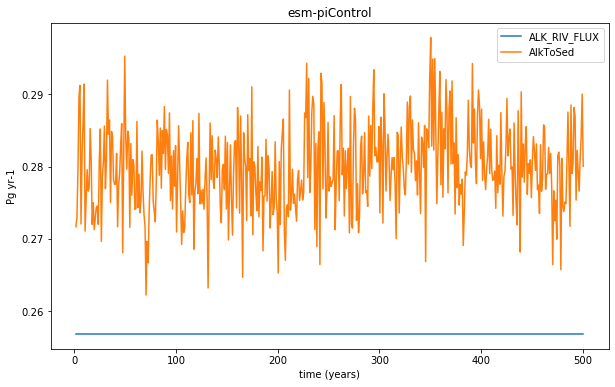

In [7]:
tseries_mod.tseries_plot_1ds(ds_ann, ['ALK_RIV_FLUX', 'AlkToSed'], title=experiment, region_val='Global')

In [8]:
experiment = 'piControl-2deg'
ds = tseries_mod.tseries_get_vars(varnames, 'ocn', experiment)

In [9]:
ds['Ctot_RIV_FLUX'] = ds.DIC_RIV_FLUX + ds.DOC_RIV_FLUX + ds.DOCr_RIV_FLUX
ds.Ctot_RIV_FLUX.attrs['units'] = ds.DIC_RIV_FLUX.attrs['units']
ds.Ctot_RIV_FLUX.name = 'Ctot_RIV_FLUX'

ds['CtotToSed'] = ds.pocToSed + ds.calcToSed
ds.CtotToSed.attrs['units'] = ds.pocToSed.attrs['units']
ds.CtotToSed.name = 'CtotToSed'

ds['AlkToSed'] = 2*ds.calcToSed
ds.AlkToSed.attrs['units'] = ds.calcToSed.attrs['units']
ds.AlkToSed.name = 'AlkToSed'

# ds

In [10]:
ds_ann = esmlab_wrap.compute_ann_mean(ds)
# ds_ann

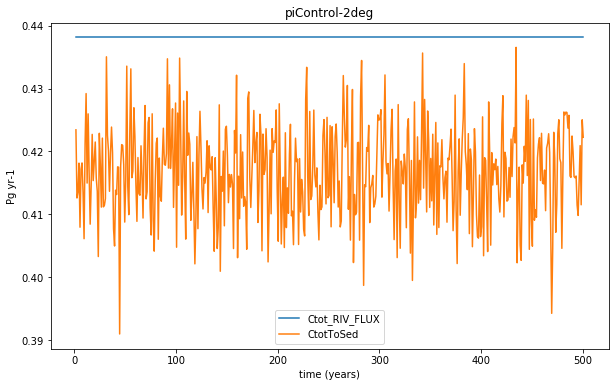

In [11]:
tseries_mod.tseries_plot_1ds(ds_ann, ['Ctot_RIV_FLUX', 'CtotToSed'], title=experiment, region_val='Global')

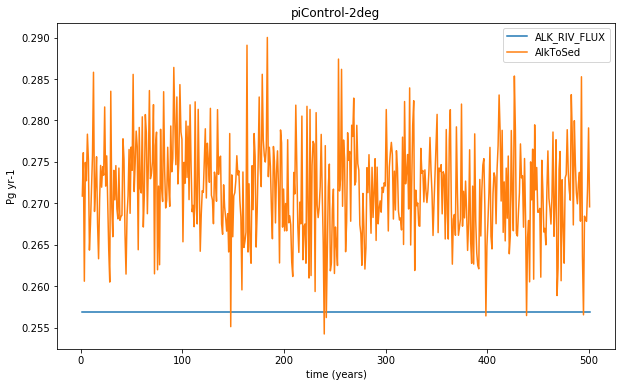

In [12]:
tseries_mod.tseries_plot_1ds(ds_ann, ['ALK_RIV_FLUX', 'AlkToSed'], title=experiment, region_val='Global')